# 机器学习之EM算法

#### 【简介】

**最大期望算法**( Expectation-Maximization algorithm, EM )是常用的**估计参数隐变量**的利器，它是一种**迭代式**的方法，其**基本想法**是：若参数**θ已知**，则可根据训练数据**推断出最优隐变量Z的值**(**E**步)；反之，若**Z**的值**已知**，则可方便地**对参数θ做极大似然估计**( **M**步 )。

#### 【目录】

1. [极大似然估计](#1.-极大似然估计)
2. [实现EM算法的单次迭代过程](#2.-实现EM算法的单次迭代过程)
3. [实现EM算法的主循环](#3.-实现EM算法的主循环)

## 1. 极大似然估计

### 什么是极大似然估计

先拆字释意：

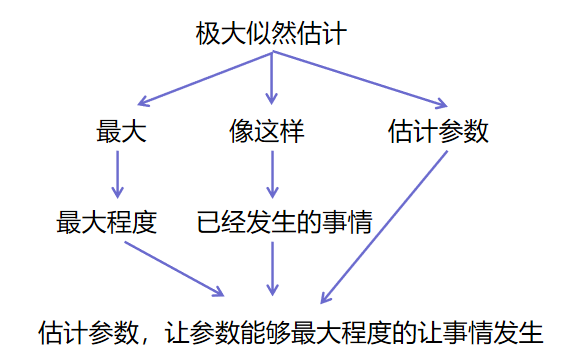

一句话概括：最大程度地根据已经发生的事情估计参数。

举个例子：一个袋子中总共有黑白两种颜色的球，总共有100个，其中一种颜色的球有90个。现在随机从袋子中取出一个球，发现是黑球。那么问你是黑色球有90个，还是白色球90个？

此时你可能会认为是黑色球有90个。因为随机抽取一个球，是黑色的(已经发生的事情)，说明黑色抽中的概率最大(最大程度)，因此猜测90个的是黑色球(估计)。这其实就是**极大似然估计**。

### 极大似然估计的原理

如果用数学语言来描述极大似然估计的话，就是如果事件的发生与参数$\theta$有关，并假设事件发生时的样本为$x_1,...,x_k$，那么$\hat\theta(x_1,...,x_k)$就是参数$\theta$的估计值。当$\theta=\hat \theta(x_1,...,x_k)$时，表示当前样本发生的概率最大。

举个例子：在《权力的游戏》中有个场景，老徒利死的时候，尸体放在船上，需要弓箭手在岸边发射火箭引燃。但是当时的艾德慕·徒利公爵射了三箭都没中，布林登·徒利实在看不下去了，通过旗帜判断风向，一箭命中！因此箭能否射中靶心，不仅跟弓箭手的瞄准能力有关，还跟外界的风向有关系。假设不考虑人的因素，只考虑风的大小。同样的瞄准和力度，风太大不行、太小也不行。那我们如果给风的大小设置一个值为heta。假设一名弓箭手射出了三只箭，分别是8环、6环、7环,即$(x_1=8,x_2=6,x_3=7)$，当时风的大小为88。那么我们认为只有$\theta=88$，发生上面事件的概率最大。

### 极大似然估计的计算方法

假设一个袋子装有白球与红球，比例未知，现在抽取10次（每次抽完都放回，保证事件独立性），假设抽到了7次白球和3次红球，在此数据样本条件下，你可能会下意识的认为袋子中白球的比例为0.7，但是我们同样可以采用最大似然估计法求解袋子中白球的比例。

假设袋子中白球的比例为参数$\theta$。简单起见，首先定义从袋子中随机抽取两次球摸到白球和红球的概率，如下（其中$f$表示模型，$x_1$表示第一次摸球，$x_2$表示第二次摸球）：

$$
f(x_1,x_2|\theta)=f(x_1|\theta) \times f(x_2|\theta)
$$

由于$\theta$未知，所以我们将这个未知量$\theta$放到一个函数中作为参数，这个函数称为**似然函数**。

$$
L(\theta|x_1, x_2) = f(x_1, x_2|\theta) = \prod_{i=1}^2 f(x_i|\theta)
$$

有了似然函数之后，很明显，就是想要知道当$\theta$为何值时似然函数$L$的值最大。找到了这个$\theta$就相当于完成了极大似然估计。那么怎么找呢？回忆一下高数所学的知识，会发现可以通过对$\theta$求导。但是现在的似然函数$L$求导不方便，所以我们需要**对似然函数$L$取对数处理**。经过取对数处理后的似然函数通常称为**对数似然函数**。

$$
lnL(\theta x_1, x_2) = lnf(x_1, x_2|\theta) = \sum_{i=1}^2lnf(x_i|\theta)
$$

为了数学计算上更方便，通常会对**对数似然函数**求个**均值**，得到**平均对数似然函数**。

$$
\hat l = \frac{1}{2}lnL(\theta|x_1, x_2)
$$

若将找到的合适的$\theta$表示为$hat\theta_{mle}$，则有：

$$
\hat \theta_{mle} = argmax\hat l(\theta|x_1, x_2)
$$

这是从袋子里随机抽取两个球的极大似然估计的数学表示。例子中是从袋子里随机抽取了十次球，根据刚刚所学的知识，我们能够很容易的进行扩展。假设抽取到白球的概率为$\theta$，很显然抽取到红球的概率就是$1−\theta$。所以从袋子里抽取十次，有七次是抽到白球的似然函数L可以表示为：

$$
L(\theta|x_1, x_2, ..., x_{10}) = f(x_1|\theta) \times f(x_2|\theta) \times ... \times f(x_{10}|\theta) = \theta^7(1-\theta)^3
$$

则其平均对数似然函数可表示为：

$$
\hat l = \frac{1}{10}ln(\theta^7(1 - \theta)^3) = \frac{1}{10}(7ln\theta + 3ln(1 - \theta))
$$

接下来就可以对$\theta$求导，并令导数为0。

$$
\frac{dlnL(\theta)}{d\theta} = \frac{1}{10}(\frac{7}{\theta} - \frac{3}{1-\theta}) = 0 => \theta = 0.7
$$

我们会发现通过**极大似然估计法**计算出的白球的比例与我们下意识的判断一致。

因此极大似然估计的计算步骤总共**4**步:

1. 构造似然函数$L(\theta)$
2. 取对数$lnL(\theta)$
3. 求导,并令导数为$0$
4. 解方程得到$\theta$

## 2. 实现EM算法的单次迭代过程

### 任务描述

用 python 实现 EM 算法的单次迭代过程。

### 相关知识

为了完成本任务，需要掌握：

- EM算法的核心思想；
- EM算法单次迭代的算法流程

#### 引例

假设有两枚硬币A、B，以相同的概率随机选择一个硬币，进行如下的抛硬币实验：共做5轮实验，每轮实验独立地抛5次，结果如下表所示：

| 硬币 | 第1次结果 | 第2次结果 | 第3次结果 | 第4次结果 | 第5次结果 |
|:-- |:-- |:-- |:-- |:-- |:--|
| A | 正面 | 正面 | 反面 | 正面 | 反面 |
| B | 反面 | 反面 | 正面 | 正面 | 反面 |
| A | 正面 | 反面 | 反面 | 反面 | 反面 |
| B | 正面 | 反面 | 反面 | 正面 | 正面 |
| A | 反面 | 正面 | 正面 | 反面 | 反面 |

假设实验数据记录员可能是实习生，业务不一定熟悉，造成1和2两种情况：

1. 实习生记录了详细的试验数据，我们可以观测到试验数据中每次选择的是A还是B
2. 实习生忘了记录每次试验选择的是A还是B ，我们无法观测实验数据中选择的硬币是哪个

那么问题来了，在这两种情况下应该如何分别估计A，B两枚硬币在抛掷硬币时正面出现的概率是多少？

如果是情况1，很显然既然知道每次实验用的硬币是A还是B ，那么就可以统计正反面的出现次数，从而可以用频率来估计概率(极大似然估计)。

如果是情况2，实验用的是硬币A还是硬币B就成了隐变量(无法观测到的变量)，这个时候就不好估计了。

那有什么好的办法能解决情况2这种问题呢？有！那就是**EM算法**。

#### EM算法的核心思想

假设Y表示观测到的随机变量的数据，Z表示隐变量的数据。于是Y和Z连在一起被称为完全观测数据，仅Y一个被称为不完全观测数据。

现在发现EM算法面临的问题主要就是：有个隐变量Z 。而如果Z已知的话，那问题就可用极大似然估计求解了。所以关键是怎样把Z变成已知。

再举个生活中的例子：假设你是饭店里的厨师，现在需要把锅里的菜平均分配到两个碟子里。正因为根本无法估计一个碟子里应该盛多少菜，所以无法一次性把菜完全平均分配。

那么你可能会这样做：把锅里的菜一股脑倒进两个碟子里，然后看看哪个碟子里的菜多，就把这个碟子中的菜往另一个碟子中匀匀，之后重复多次匀匀的过程，直到两个碟子中菜的量大致一样。

如果你会这样想，那么你已经会EM算法了。因为EM算法的思想就是：

1. 先给θ设置一个初值
2. E步:根据给定观测数据Y和当前的参数θ，求隐变量Z的条件概率分布的期望
3. M步:E步中Z已经求出来了，于是根据极大似然估计求最优的θ
4. 因为第二步和第三步的结果可能不是最优的，所以重复第二步和第三步，直到收敛

#### EM 算法单次迭代的算法流程

现在已经大致了解了EM算法的核心思想，那么不如趁热打铁用引例中硬币的例子来详细地走一遍EM算法单次迭代的流程（因为会了单次迭代，剩下的就是循环的事了）。

假设抛掷硬币A和硬币B后正面朝上的概率分别为$P_A$和$P_B$。

如果是情况1，那么很容易估计出$P_A = (3 + 1 + 2) / 15 = 0.4$, $P_B = (2 + 3) / 10 = 0.5 $。

如果是情况2，此时我们多了一个**硬币种类**的**隐变量**。假设该隐变量为$Z$ ，可以把它认为是一个5维的向量$(z_1, z_2, z_3, z_4, z_5)$ ，代表每次投掷时所使用的硬币，比如$z_1$，就代表第1轮投掷时使用的硬币是$A$还是$B$。

首先随机给$P_A$和$P_B$一个初始值，比如$P_A=0.2$，$P_B=0.7$。

然后计算出每一轮假设抛掷的是硬币A和硬币B的似然。例如：
- 假设第1轮抛出的是硬币A ，那么似然A：$0.2 \times 0.2 \times 0.2 \times 0.8 \times 0.8=0.00512$
- 假设第1轮抛出的是硬币B ，则有似然B：$0.7 \times 0.7 \times 0.7 \times 0.3 \times 0.3=0.03087$

其他4轮如法炮制。

然后对每一轮是硬币A还是硬币B的似然进行归一化。例如第1轮抛出的是硬币A的概率为$0.00512/(0.00512+0.03087)=0.14226$，抛出的是硬币B的概率为$0.03087/(0.00512+0.03087)=0.85774$

接着计算每一轮硬币A和硬币B正反面朝上的次数(也就是期望)。例如第1轮中：

- 硬币A正面朝上的次数为：$0.14226 \times 3=0.42678$
- 硬币A反面朝上的次数为：$0.14226 \times 2=0.28452$
- 硬币B正面朝上的次数为：$0.85774 \times 3=2.57319$
- 硬币B反面朝上的次数为：$0.85774 \times 2=1.71546$

其他4轮如法炮制。

到这里E步已经做完了，把各轮的期望次数加起来，结果如下：

| 硬币 | 正面朝上出现次数 | 反面朝上出现次数 |
|:-- |:-- |:-- |
| A | 4.21897 | 7.95532 |
| B | 6.78102 | 6.04467 |

**E**步中已经得到了喜闻乐见统计结果，接下来的**M**步非常简单，就是算**频率**。所以：
- 硬币A正面朝上的概率为：$P_A=4.21897/(4.21897+7.95532)=0.34655$
- 硬币B正面朝上的概率为：$P_B=6.78102/(6.78102+6.04467)=0.52871$

这个时候我们就完成了**一次EM算法的迭代**过程。

### 实操练习

#### 编程要求

根据提示，补充`Begin-End`段中的代码，完成`em_single(priors, observations)`函数。该函数需要完成的功能是模拟抛掷硬币实验并估计在一次迭代中，硬币A与硬币B正面朝上的概率。其中：

- `init_values` ：硬币A与硬币B正面朝上的概率的初始值，类型为list，如 `[0.2, 0.7]`代表硬币A正面朝上的概率为0.2，硬币B正面朝上的概率为0.7。

- `observations` ：抛掷硬币的实验结果记录，类型为`list`。 `list`的行数代表做了几轮实验，列数代表每轮实验用某个硬币抛掷了几次。`list`中的值代表正反面，0代表反面朝上，1代表正面朝上。如`[[1, 0, 1]，[0, 1, 1]]` 表示进行了两轮实验，每轮实验用某硬币抛掷三次。第一轮的结果是正反正，第二轮的结果是反正正。

- 返回值：将估计出来的硬币A和硬币B正面朝上的概率组成`list`返回。如`[0.4, 0.6]`表示你认为硬币A正面朝上的概率为0.4，硬币B正面朝上的概率为0.6。

#### 测试说明

测试输入：
`{‘init_values’:[0.2, 0.7], ‘observations’:[[1, 1, 0, 1, 0], [0, 0, 1, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 1], [0, 1, 1, 0, 0]]
}`

预期输出：`[0.346548, 0.528706]`

In [1]:
import numpy as np
from scipy import stats
def em_single(init_values, observations):
    """
    模拟抛掷硬币实验并估计在一次迭代中，硬币A与硬币B正面朝上的概率
    :param init_values:硬币A与硬币B正面朝上的概率的初始值，类型为list，如[0.2, 0.7]代表硬币A正面朝上的概率为0.2，硬币B正面朝上的概率为0.7。
    :param observations:抛掷硬币的实验结果记录，类型为list。
    :return:将估计出来的硬币A和硬币B正面朝上的概率组成list返回。如[0.4, 0.6]表示你认为硬币A正面朝上的概率为0.4，硬币B正面朝上的概率为0.6。
    """
    #********* Begin *********#
    observations = np.array(observations)
    counts = {'A': {'H': 0, 'T': 0}, 'B': {'H': 0, 'T': 0}}
    theta_A = init_values[0]
    theta_B = init_values[1]
    # E step
    for observation in observations:
        len_observation = len(observation)
        num_heads = observation.sum()
        num_tails = len_observation - num_heads
        # 两个二项分布
        contribution_A = stats.binom.pmf(num_heads, len_observation, theta_A)
        contribution_B = stats.binom.pmf(num_heads, len_observation, theta_B)
        weight_A = contribution_A / (contribution_A + contribution_B)
        weight_B = contribution_B / (contribution_A + contribution_B)
        # 更新在当前参数下A、B硬币产生的正反面次数
        counts['A']['H'] += weight_A * num_heads
        counts['A']['T'] += weight_A * num_tails
        counts['B']['H'] += weight_B * num_heads
        counts['B']['T'] += weight_B * num_tails
    # M step
    new_theta_A = counts['A']['H'] / (counts['A']['H'] + counts['A']['T'])
    new_theta_B = counts['B']['H'] / (counts['B']['H'] + counts['B']['T'])
    return [new_theta_A, new_theta_B]

In [4]:
input_data = {
    'init_values':[0.2, 0.7], 
    'observations':[[1, 1, 0, 1, 0], 
                    [0, 0, 1, 1, 0], 
                    [1, 0, 0, 0, 0], 
                    [1, 0, 0, 1, 1], 
                    [0, 1, 1, 0, 0]]
}

em_single(input_data['init_values'], input_data['observations'])

[0.3465477962086954, 0.5287058763827479]

## 3. 实现EM算法的主循环

### 任务描述

用 python 实现 EM 算法的迭代过程。

### 相关知识

为了完成本关任务，需要掌握 EM 算法的迭代流程。

#### EM算法的迭代流程

在对EM算法的单次迭代过程以及EM算法的核心思想和流程有一定了解后，下面就是迭代，即不断调整优化参数。
EM算法的迭代流程很简单，就是循环调用单次迭代过程而已。不过在循环时需要加上**终止条件**。一般来说终止条件有两个：

- 最大迭代次数： EM算法的最大循环次数
- 参数变化的容忍度：当EM算法估计出来的参数θ不怎么变化时，可以提前挑出循环。例如容忍度为1e-3，则表示若这次迭代的估计结果与上一次迭代的估计结果之间的差异小于1e-3则跳出循环。

伪代码如下:

In [7]:
def em(observations, theta, max_iterations):
    theta = init_values
    # 循环max_iteration次
    for _ in range(max_iteration):
        new_theta = em_single(theta, observations)
        # 当差异小于1e-3跳出循环
        if np.sum(np.abs(new_theta-theta)) < 1e-3:
            break
        theta = new_theta
    return new_theta

### 实操练习

#### 编程要求

根据提示，补充`Begin-End`段中的代码，完成`em(observations, thetas, tol=1e-4, iterations=100)`函数。该函数需要完成的功能是模拟抛掷硬币实验并迭代估计硬币A与硬币B正面朝上的概率。其中：

- observations：抛掷硬币的实验结果记录，类型为`list`。 `list`的行数代表做了几轮实验，列数代表每轮实验用某个硬币抛掷了几次。 `list`中的值代表正反面， 0代表反面朝上， 1代表正面朝上。如`[[1, 0, 1], [0, 1, 1]]`表示进行了两轮实验，每轮实验用某硬币抛掷三次。第一轮的结果是正反正，第二轮的结果是反正正。

- `thetas`：硬币A与硬币B正面朝上的概率的初始值，类型为`list`，如 `[0.2, 0.7]`代表硬币A正面朝上的概率为0.2，硬币B正面朝上的概率为0.7。

- `tol`：差异容忍度，即当EM算法估计出来的参数`theta`不怎么变化时，可以提前挑出循环。例如容忍度为`1e-4`，则表示若这次迭代的估计结果与上一次迭代的估计结果之间的L1距离小于`1e-4`则跳出循环。

- `iterations` ：EM算法的最大迭代次数。

- 返回值：将估计出来的硬币A和硬币B正面朝上的概率组成`list`或者`ndarray`返回。如`[0.4, 0.6]`表示你认为硬币A正面朝上的概率为0.4 ，硬币B正面朝上的概率为 0.6。

#### 测试说明

测试输入： 
`{‘init_values’:[0.2, 0.7], ‘observations’:[[1, 1, 0, 1, 0], [0, 0, 1, 1, 0], [1, 0, 0, 0, 0], [1, 0, 0, 1, 1], [0, 1, 1, 0, 0]]}` 

预期输出：`[0.439928, 0.440072]` 

In [8]:
def em(observations, thetas, tol=1e-4, iterations=100):
    """
    模拟抛掷硬币实验并使用EM算法估计硬币A与硬币B正面朝上的概率。
    :param observations: 抛掷硬币的实验结果记录，类型为list。
    :param thetas: 硬币A与硬币B正面朝上的概率的初始值，类型为list，如[0.2, 0.7]代表硬币A正面朝上的概率为0.2，硬币B正面朝上的概率为0.7。
    :param tol: 差异容忍度，即当EM算法估计出来的参数theta不怎么变化时，可以提前挑出循环。例如容忍度为1e-4，则表示若这次迭代的估计结果与上一次迭代的估计结果之间的L1距离小于1e-4则跳出循环。为了正确的评测，请不要修改该值。
    :param iterations: EM算法的最大迭代次数。为了正确的评测，请不要修改该值。
    :return: 将估计出来的硬币A和硬币B正面朝上的概率组成list或者ndarray返回。如[0.4, 0.6]表示你认为硬币A正面朝上的概率为0.4，硬币B正面朝上的概率为0.6。
    """
    #********* Begin *********#
    iteration = 0
    thetas = np.array(thetas)
    while iteration < iterations:
        new_thetas = np.array(em_single(thetas, observations))
        delta_change = np.sum(np.abs(thetas - new_thetas))
        if delta_change < tol:
            break
        else:
            thetas = new_thetas
        iteration += 1
    return thetas
    #********* End *********#

In [10]:
input_data = {
    'init_values':[0.2, 0.7], 
    'observations':[[1, 1, 0, 1, 0], 
                    [0, 0, 1, 1, 0], 
                    [1, 0, 0, 0, 0], 
                    [1, 0, 0, 1, 1], 
                    [0, 1, 1, 0, 0]]
}

em(input_data['observations'], input_data['init_values'])

array([0.43992757, 0.44007243])